In [23]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import pickle
sb.set() # set the default Seaborn style for graphics

In [24]:
df = pd.read_pickle('../dataset/data_prepare2.pickle')
df.head()

,rating,reviews,happiness,ceo_approval,ceo_count,roles,salary,employees,industry,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,Management,Culture
9,4.2,803,"{'Work Happiness Score': '76', 'Appreciation':...",83,275,"{'Mentor': '5.0', 'Intern': '5.0', 'Security C...","{'Graduate Researcher': '$26,598 per year', 'R...",8,Education,7,4.0,3.7,3.6,3.7,4.0
16,4.1,501,"{'Work Happiness Score': '70', 'Learning': '81...",89,181,NaN,"{'Program Coordinator': '$48,016 per year', 'R...",8,Education,7,4.1,3.8,3.7,3.7,3.9
34,3.9,167,"{'Work Happiness Score': '71', 'Purpose': '77'...",90,79,"{'Director of Human Resources': '5.0', 'Food R...","{'Housekeeper': '$12.57 per hour', 'Attendant'...",8,"Restaurants, Travel and Leisure",5,3.6,3.7,3.5,3.4,3.8
35,2.7,541,"{'Work Happiness Score': '45', 'Achievement': ...",41,233,"{'Technician': '3.8', 'Personal Technology Exp...","{'Service Technician': '$10.49 per hour', 'Des...",7,Information Technology,4,2.8,2.5,2.2,2.5,2.6
41,3.2,271,"{'Work Happiness Score': '60', 'Achievement': ...",58,117,"{'Bookkeeper': '4.3', 'Delivery Specialist': '...","{'Yard Worker': '$8.14 per hour', 'Yard Specia...",7,Construction & Facilities Services,7,3.2,3.0,2.6,2.8,3.0


## Exploring numeric variable distributions

<AxesSubplot:xlabel='rating', ylabel='Count'>

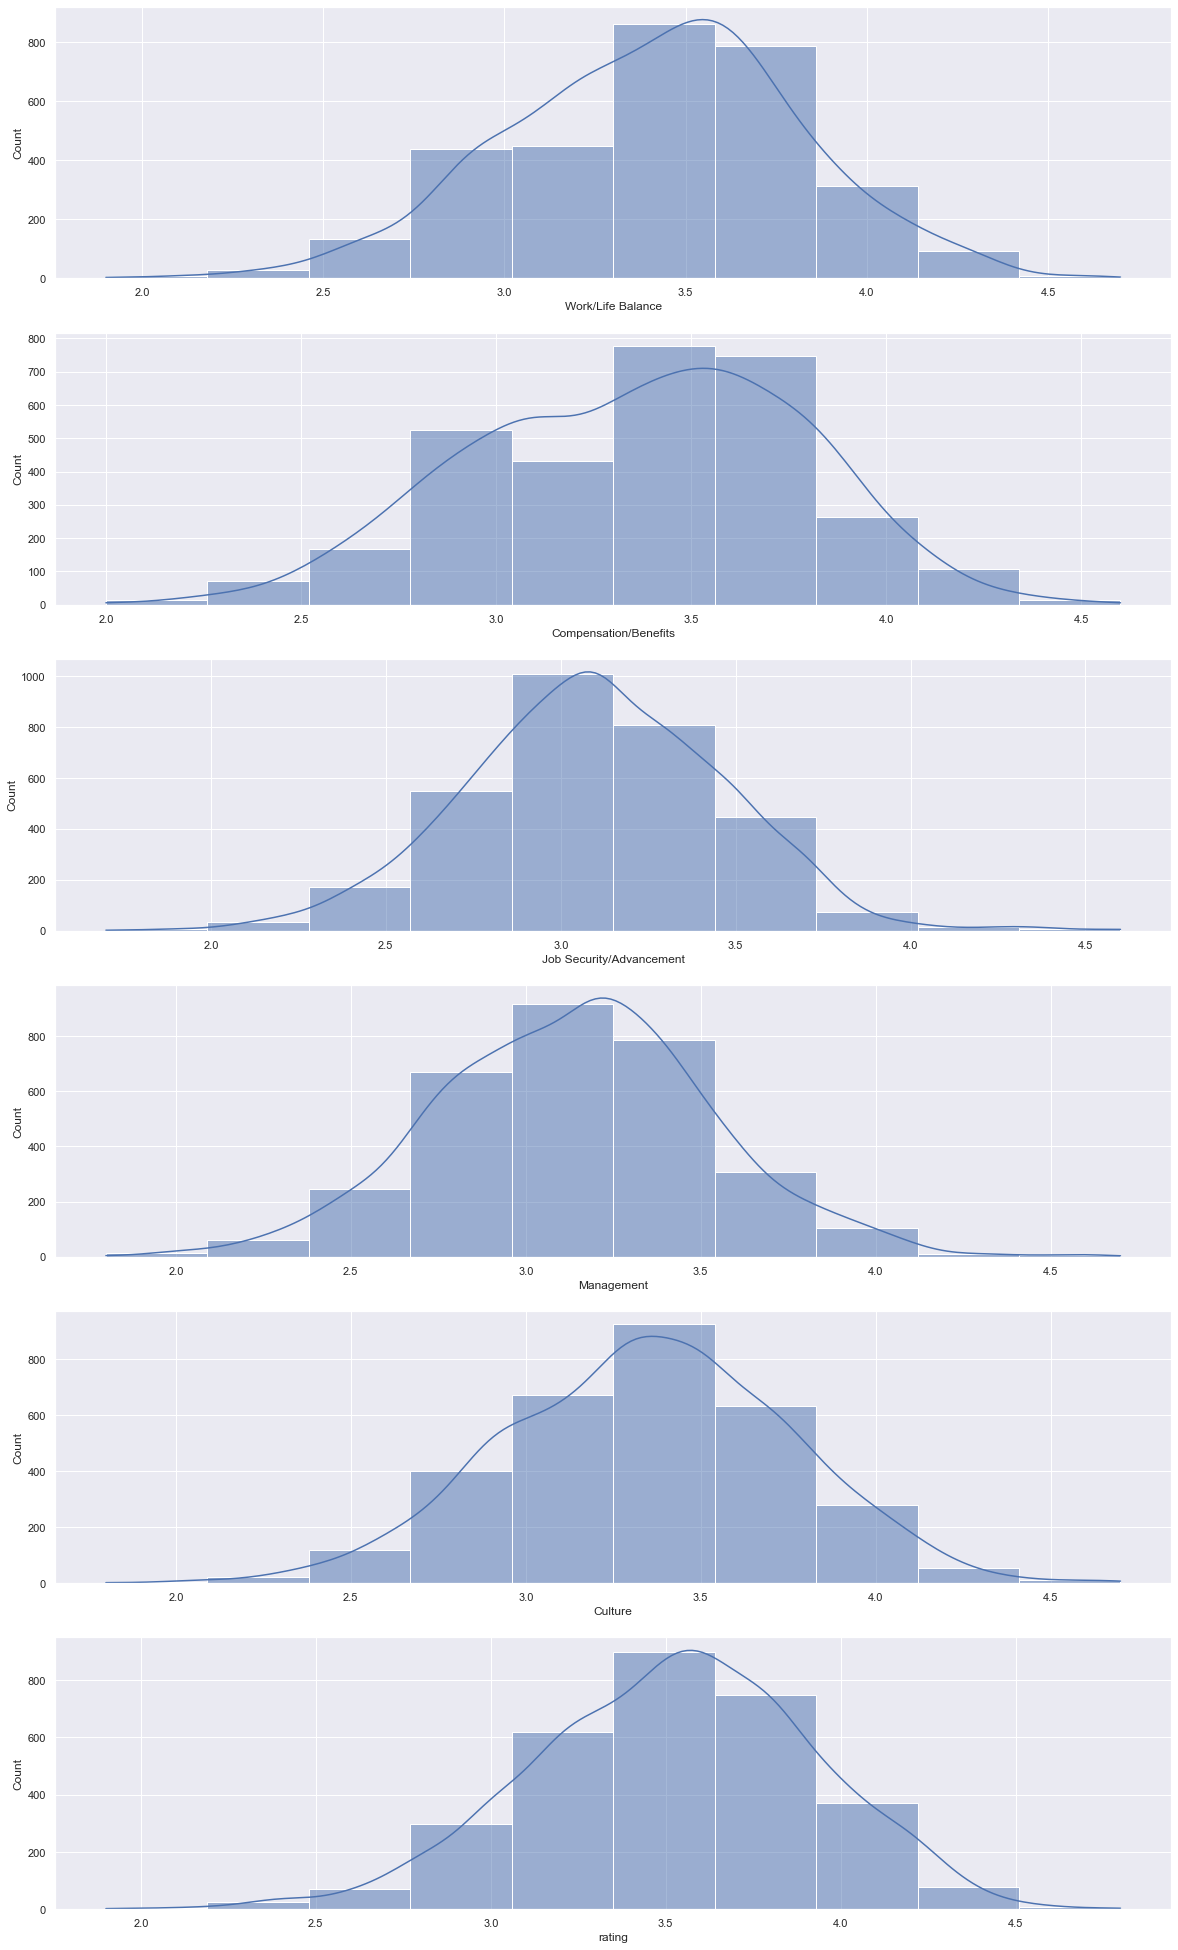

In [38]:
fig, axs = plt.subplots(6, figsize=(20,35))

for i, col in enumerate(['Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 'Management', 'Culture']):
    sb.histplot(df[col], bins=10, ax=axs[i], kde=True)
    
sb.histplot(df['rating'], bins=10, ax=axs[5], kde=True)

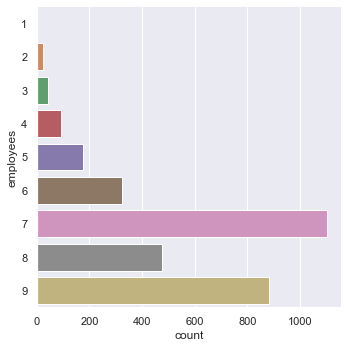

In [44]:
sb.catplot(y='employees', data=df, kind='count')

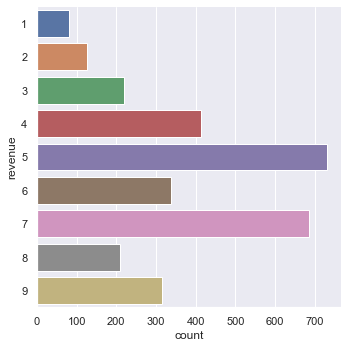

In [46]:
sb.catplot(y='revenue', data=df, kind='count')

## Separate based on sector

In [11]:
df['industry'].unique()

array(['Education', 'Restaurants, Travel and Leisure',
       'Information Technology', 'Construction & Facilities Services',
       'Healthcare', 'Nonprofit & NGO', 'Retail & Wholesale',
       'Aerospace & Defense', 'Financial Services', 'Manufacturing',
       'Retail', 'Pharmaceutical & Biotechnology', 'Food and Beverages',
       'Consumer Goods and Services', 'Insurance', 'Automotive',
       'Transportation & Logistics', 'Computers and Electronics',
       'Consulting and Business Services', 'Media & Communication',
       'Telecommunications', 'Energy, Mining & Utilities',
       'Agriculture and Extraction', 'Government & Public Administration',
       'Real Estate', 'Human Resources & Staffing',
       'Hotels & Travel Accommodation', 'Personal Consumer Services',
       'Restaurants & Food Service', 'Management & Consulting',
       'Manufacturing\nConstruction & Facilities Services', 'Agriculture',
       'Arts, Entertainment & Recreation',
       'Manufacturing\nEnergy, Mi

In [12]:
Financials = ['Financial Services', 'Insurance', 'Consulting and Business Services', 'Human Resources & Staffing', 
              'Management & Consulting', 'Insurance\nHealthcare']
Leisure = ['Restaurants, Travel and Leisure', 'Hotels & Travel Accommodation', 'Restaurants & Food Service', 
           'Arts, Entertainment & Recreation', 'Restaurants, Travel and Leisure\nRestaurants, Travel and Leisure']
Healthcare_NGO = ['Healthcare', 'Nonprofit & NGO', 'Healthcare\nNonprofit & NGO', 'Pharmaceutical & Biotechnology']
Telecomm = ['Media & Communication', 'Telecommunications']
Govt_Services = ['Education', 'Aerospace & Defense', 'Government & Public Administration', 'Legal', 
                 'Transportation & Logistics']
Tech = ['Computers and Electronics', 'Internet and Software']
Commodities = ['Manufacturing', 'Energy, Mining & Utilities', 'Agriculture and Extraction', 'Agriculture', 
               'Agriculture and Extraction\nAgriculture and Extraction', 'Manufacturing\nEnergy, Mining & Utilities',
              'Manufacturing\nConstruction & Facilities Services']
Real_Estate = ['Construction & Facilities Services', 'Real Estate']
FNB = ['Restaurants & Food Service', 'Food and Beverages']
Retail = ['Retail & Wholesale', 'Retail', 'Consumer Goods and Services', 'Automotive', 'Personal Consumer Services']

In [16]:
dataset = {}

dataset['Financials'] = df[df['industry'].isin(Financials)]
dataset['Leisure'] = df[df['industry'].isin(Leisure)]
dataset['Healthcare_NGO'] = df[df['industry'].isin(Healthcare_NGO)]
dataset['Telecomm'] = df[df['industry'].isin(Telecomm)]
dataset['Govt_Services'] = df[df['industry'].isin(Govt_Services)]
dataset['Tech'] = df[df['industry'].isin(Tech)]
dataset['Commodities'] = df[df['industry'].isin(Commodities)]
dataset['Real_Estate'] = df[df['industry'].isin(Real_Estate)]
dataset['FNB'] = df[df['industry'].isin(FNB)]
dataset['Retail'] = df[df['industry'].isin(Retail)]

# aaa